In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from datasets import (load_Y2H_union_25,
                   load_lit_bm_24,
                   load_I3D_exp_24,
                     load_protein_properties,
                     load_AlphaFold_RoseTTAFold)
from plotting import (samogram,
                      COLOR_Y2H,
                      COLOR_LIT,
                      COLOR_I3D)

In [2]:
plt.show()
mpl.rcParams['font.size'] = 7.
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['savefig.dpi'] = 500
cmaps = [LinearSegmentedColormap.from_list('Y2H-union-25', ['white', COLOR_Y2H, 'black'], 1000),
         LinearSegmentedColormap.from_list('Lit-BM-20', ['white', COLOR_LIT, 'black'], 1000),
         LinearSegmentedColormap.from_list('I3D-exp-20', ['white', COLOR_I3D, 'black'], 1000),
         LinearSegmentedColormap.from_list('AlphaFold+\nRoseTTAFold', ['white', 'brown', 'black'], 1000),]
for cmap in cmaps:
    plt.register_cmap(name=cmap.name, cmap=cmap)

In [3]:
abbi = load_Y2H_union_25(remove_homodimers=True)
i3d = load_I3D_exp_24(remove_homodimers=True, include_date=True)
lit = load_lit_bm_24(remove_homodimers=True, include_date=True)
afrf = load_AlphaFold_RoseTTAFold(remove_homodimers=True, restrict_to_high_confidence=True)
y2h_union = abbi.loc[abbi['Uetz-screen'] | abbi['Ito-core'] | abbi['CCSB-YI1'], :].copy()
gene_properties = load_protein_properties()

NOTE: dropping 6 pairs with missing ORF names


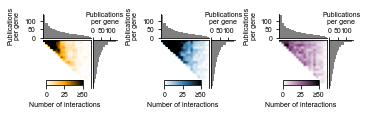

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(w=2*3, h=2)

for ax, ds, cmap in zip(axs, [i3d, lit, y2h_union], ['I3D-exp-20', 'Lit-BM-20', 'Y2H-union-25']):
    samogram(
        ppis=ds,
        ax=ax,
        draw_up=True,
        draw_right=True,
        gene_property=gene_properties['Publication count'],
        n_bins=20,
        vmax=50,
        size_ratio=0.5,
        ylabel='Publications\nper gene',
        zticks=[0, 25, 50],
        yticks=[0, 50, 100],
        colorbar_width=0.75,
        cmap=cmap,
        correct_diagonal=True,
        self_interactions=False,
        color='grey',

    )

fig.savefig('../figures/I3D-exp-24_Lit-BM-24_Y2H-union_samogram.pdf',
            bbox_inches='tight')

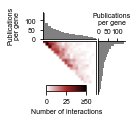

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(w=2, h=2)

samogram(
    ppis=afrf,
    ax=ax,
    draw_up=True,
    draw_right=True,
    gene_property=gene_properties['Publication count'],
    n_bins=20,
    vmax=50,
    size_ratio=0.5,
    ylabel='Publications\nper gene',
    zticks=[0, 25, 50],
    yticks=[0, 50, 100],
    colorbar_width=0.75,
    cmap='AlphaFold+\nRoseTTAFold',
    correct_diagonal=True,
    self_interactions=False,
    color='grey',

)

fig.savefig('../figures/AlphaFoldRoseTTAFold-core_samogram.pdf',
            bbox_inches='tight')

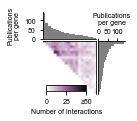

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(w=2, h=2)

samogram(
    ppis=abbi.loc[abbi['YeRI'], :],
    ax=ax,
    draw_up=True,
    draw_right=True,
    gene_property=gene_properties['Publication count'],
    n_bins=20,
    ylabel='Publications\nper gene',
    vmax=50,
    size_ratio=0.5,
    zticks=[0, 25, 50],
    yticks=[0, 50, 100],
    colorbar_width=0.75,
    cmap='Y2H-union-25',
    correct_diagonal=True,
    self_interactions=False,
    color='grey',
)

fig.savefig('../figures/YeRI_samogram.pdf',
            bbox_inches='tight')